<h1>Cuadratura Gaussiana</h1>

In [19]:
#Fun fact: ecuacion diff de orden 4 --> ecuacion biarmonica para la vibracion de las campanas

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import math

In [21]:
deg = 2
x2,w2 = np.polynomial.legendre.leggauss(deg)
print(x2)
print(1/np.sqrt(3))
print(w2)

[-0.57735027  0.57735027]
0.5773502691896258
[1. 1.]


In [22]:
deg = 3
x3,w3 = np.polynomial.legendre.leggauss(deg)
print(x3)
print(w3)

[-0.77459667  0.          0.77459667]
[0.55555556 0.88888889 0.55555556]


In [23]:
a = 0
b = 0.5*np.pi

f = lambda x: np.cos(x)

In [24]:
t = 0.5*( (b-a)*x2 + a + b )
Integral = 0.5*(b-a)*np.sum(w2*f(t))
print(Integral)

0.9984726134041149


In [25]:
t = 0.5*( (b-a)*x3 + a + b )
Integral = 0.5*(b-a)*np.sum(w3*f(t))
print(Integral)

1.0000081215554986


In [26]:
import sympy as sym

In [27]:
x = sym.Symbol('x', real=True)
funcion = sym.sqrt(x**2 + 1)
dfuncion = sym.diff(funcion, x)
d2funcion = sym.diff(dfuncion, x)

In [28]:
funcion

sqrt(x**2 + 1)

In [29]:
dfuncion

x/sqrt(x**2 + 1)

In [30]:
d2funcion

-x**2/(x**2 + 1)**(3/2) + 1/sqrt(x**2 + 1)

In [31]:
#Convertir en numerico

fn = sym.lambdify([x], funcion, 'numpy')
dfn = sym.lambdify([x], dfuncion, 'numpy')
d2fn = sym.lambdify([x], d2funcion, 'numpy')

<IPython.core.display.Javascript object>


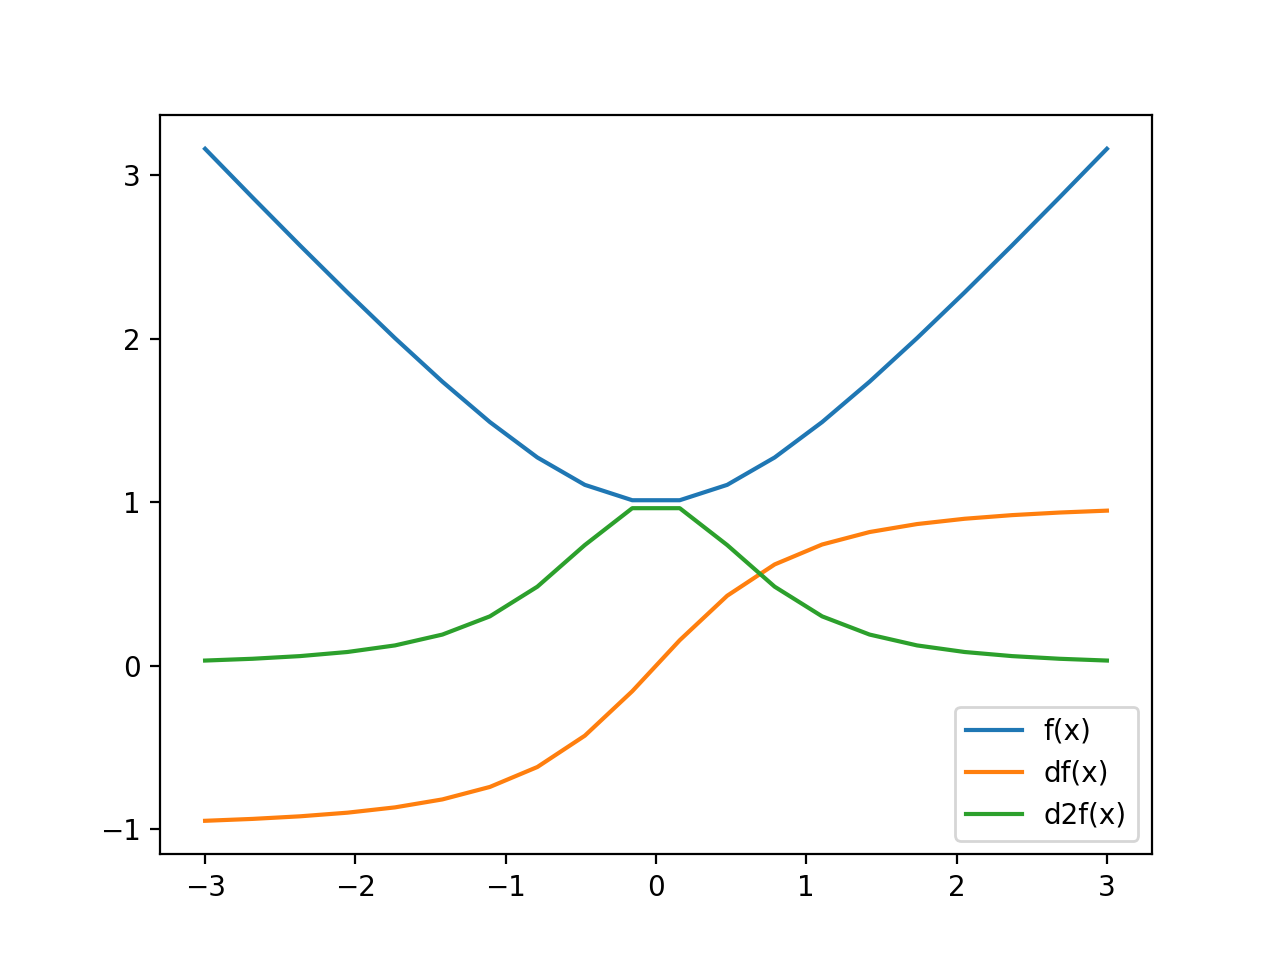

In [32]:
x = np.linspace(-3,3,20)
plt.plot(x, fn(x), x, dfn(x), x, d2fn(x))
plt.figure(1)
plt.legend(['f(x)', 'df(x)', 'd2f(x)'])
plt.show()

In [33]:
#Usando la formula de Rodrigues
def CreateLegendPoly(n):
    x = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = (x**2 - 1)**n
    poly = sym.diff(y,x,n)/(2**n * math.factorial(n))
    return poly

<IPython.core.display.Javascript object>


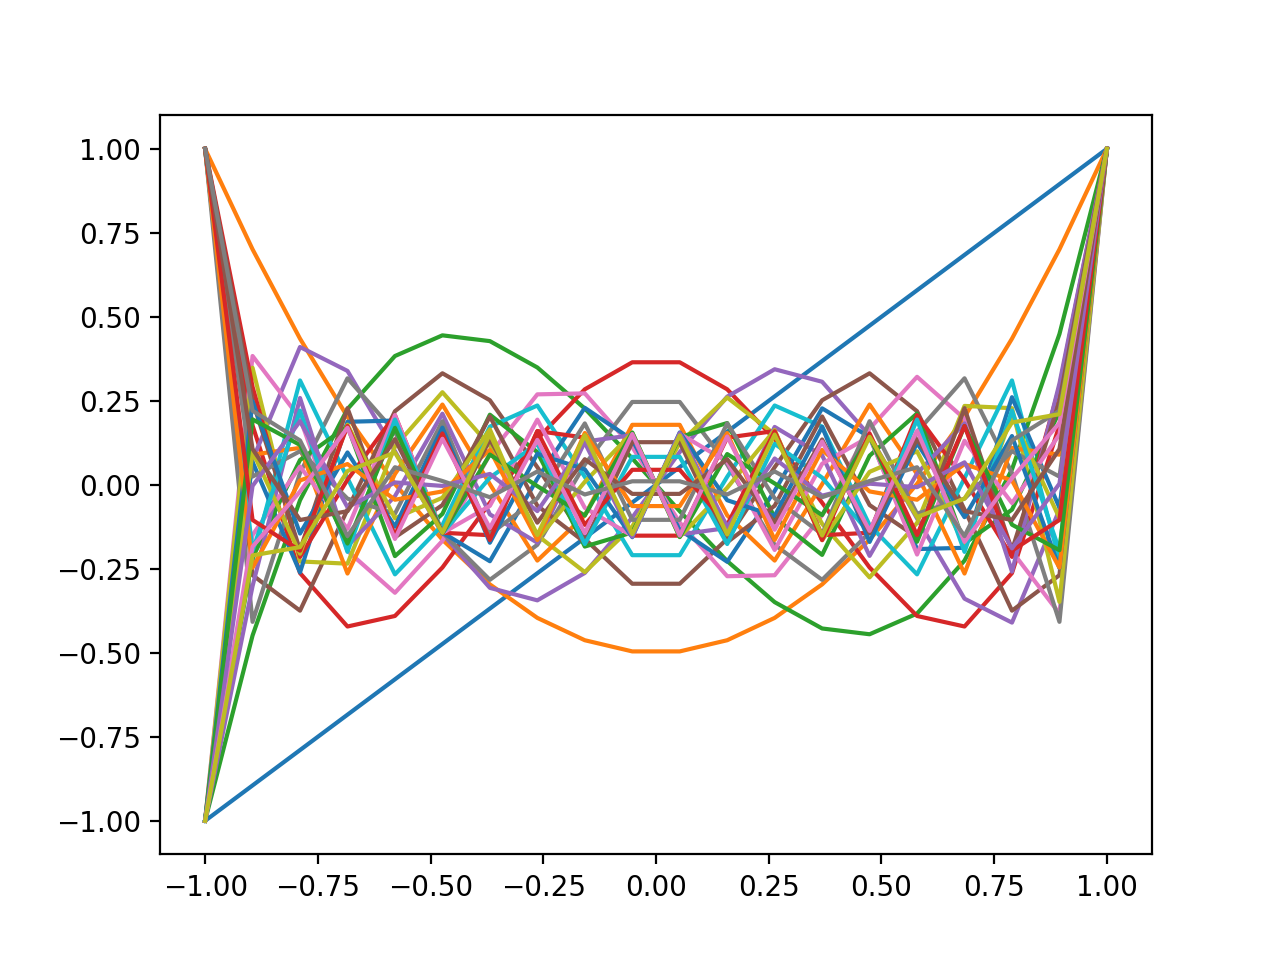

x
(3*x**2 - 1)/2
x*(5*x**2 - 3)/2
(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
(16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16
x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16
(128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128
x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128
(256*x**10 + 5760*x**8*(x**2 - 1) + 20160*x**6*(x**2 - 1)**2 + 16800*x**4*(x**2 - 1)**3 + 3150*x**2*(x**2 - 1)**4 + 63*(x**2 - 1)**5)/256
x*(256*x**10 + 7040*x**8*(x**2 - 1) + 31680*x**6*(x**2 - 1)**2 + 36960*x**4*(x**2 - 1)**3 + 11550*x**2*(x**2 - 1)**4 + 693*(x**2 - 1)**5)/256
(1024*x**12 + 33792*x**10*(x**2 - 1) + 190080*x**8*(x**2 - 1)**2 + 295680*x**6*(x**2 - 1)**3 + 138600*x**4*(x**2 - 1)**4 + 16632*x**2*(x**2 - 1)**5 + 231*(x**2 - 1)**6)/1024
x*(1024*x**12 + 39936*x**10*(x

In [37]:
plt.figure(2)
for i in range(1, 30):
    pnl = CreateLegendPoly(i)
    x = sym.Symbol('x', real=True)
    xi = np.linspace(-1, 1, 20)
    print(pnl)
    pn = sym.lambdify([x], pnl, 'numpy')
    plt.plot(xi, pn(xi))
plt.show()